In [1]:

# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

# lebel encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [2]:
from sklearn.preprocessing import MinMaxScaler
    
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('../dataset/selected_dataset_cleaned.csv')
df.head()

,type,price,beds,bath,propertysqft,street_name,latitude,longitude,zip_code,city
0,condo for sale,50000000,6,6.0,6569.000000,manhattan,40.726633,-74.008832,10013,new york
1,condo for sale,40000000,5,6.0,7488.000000,manhattan,40.715351,-74.012844,10007,new york
2,co-op for sale,169000,1,1.0,2184.207862,astoria,40.775923,-73.908733,11105,astoria
3,co-op for sale,199000,1,1.0,2184.207862,astoria,40.777200,-73.907370,11105,astoria
4,co-op for sale,225000,1,1.0,2184.207862,astoria,40.775357,-73.908548,11105,astoria


In [4]:
df.duplicated().sum()

0

In [5]:
df.dtypes

type             object
price             int64
beds              int64
bath            float64
propertysqft    float64
street_name      object
latitude        float64
longitude       float64
zip_code          int64
city             object
dtype: object

In [6]:
# we will not use street_name & city because they are confusing
# doing get dummies for type column
# df = pd.get_dummies(df, columns=['type'], drop_first= True)
df = pd.get_dummies(df, columns=['type'])

df.head()

,price,beds,bath,propertysqft,street_name,latitude,longitude,zip_code,city,type_co-op for sale,type_condo for sale,type_contingent,type_house for sale,type_multi-family home for sale,type_pending,type_townhouse for sale
0,50000000,6,6.0,6569.000000,manhattan,40.726633,-74.008832,10013,new york,0,1,0,0,0,0,0
1,40000000,5,6.0,7488.000000,manhattan,40.715351,-74.012844,10007,new york,0,1,0,0,0,0,0
2,169000,1,1.0,2184.207862,astoria,40.775923,-73.908733,11105,astoria,1,0,0,0,0,0,0
3,199000,1,1.0,2184.207862,astoria,40.777200,-73.907370,11105,astoria,1,0,0,0,0,0,0
4,225000,1,1.0,2184.207862,astoria,40.775357,-73.908548,11105,astoria,1,0,0,0,0,0,0


In [7]:
df_work = df.drop(columns= ['street_name', 'city'])
df_work.head()

,price,beds,bath,propertysqft,latitude,longitude,zip_code,type_co-op for sale,type_condo for sale,type_contingent,type_house for sale,type_multi-family home for sale,type_pending,type_townhouse for sale
0,50000000,6,6.0,6569.000000,40.726633,-74.008832,10013,0,1,0,0,0,0,0
1,40000000,5,6.0,7488.000000,40.715351,-74.012844,10007,0,1,0,0,0,0,0
2,169000,1,1.0,2184.207862,40.775923,-73.908733,11105,1,0,0,0,0,0,0
3,199000,1,1.0,2184.207862,40.777200,-73.907370,11105,1,0,0,0,0,0,0
4,225000,1,1.0,2184.207862,40.775357,-73.908548,11105,1,0,0,0,0,0,0


# First we will try k-nearest neighbor regression

In [8]:
x = df_work.drop(columns = 'price')
y = df_work['price']
x.head()

,beds,bath,propertysqft,latitude,longitude,zip_code,type_co-op for sale,type_condo for sale,type_contingent,type_house for sale,type_multi-family home for sale,type_pending,type_townhouse for sale
0,6,6.0,6569.000000,40.726633,-74.008832,10013,0,1,0,0,0,0,0
1,5,6.0,7488.000000,40.715351,-74.012844,10007,0,1,0,0,0,0,0
2,1,1.0,2184.207862,40.775923,-73.908733,11105,1,0,0,0,0,0,0
3,1,1.0,2184.207862,40.777200,-73.907370,11105,1,0,0,0,0,0,0
4,1,1.0,2184.207862,40.775357,-73.908548,11105,1,0,0,0,0,0,0


In [9]:
y.head()

0    50000000
1    40000000
2      169000
3      199000
4      225000
Name: price, dtype: int64

In [10]:
# lets split data between test & train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

## Now we will scale the data

In [11]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_train_scaled

array([[0.18181818, 0.09375   , 0.03107721, ..., 0.        , 0.        ,
        0.        ],
       [0.18181818, 0.07418315, 0.02075388, ..., 0.        , 0.        ,
        0.        ],
       [0.18181818, 0.0625    , 0.02968659, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.03125   , 0.02968659, ..., 0.        , 0.        ,
        0.        ],
       [0.27272727, 0.0625    , 0.03911838, ..., 0.        , 0.        ,
        0.        ],
       [0.09090909, 0.03125   , 0.02968659, ..., 0.        , 0.        ,
        0.        ]])

In [12]:
x_test_scaled = scaler.fit_transform(X_test)
x_test_scaled

array([[0.18181818, 0.0625    , 0.02410646, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.03436367, ..., 0.        , 0.        ,
        0.        ],
       [0.09090909, 0.0625    , 0.009199  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.09090909, 0.        , 0.01010799, ..., 0.        , 0.        ,
        0.        ],
       [0.09090909, 0.0625    , 0.03436367, ..., 0.        , 0.        ,
        0.        ],
       [0.09090909, 0.0625    , 0.01945242, ..., 0.        , 0.        ,
        1.        ]])

#Try k-nearest neighbor regression with k=5

knn_scale_5 = KNeighborsRegressor(n_neighbors = 5)
knn_scale_5.fit(x_train_scaled, y_train)

#make prediction based on knn_scale_5 model
y_test_scaled_pred = knn_scale_5.predict(x_test_scaled)
y_train_scaled_pred = knn_scale_5.predict(x_train_scaled)

#mean squared error finding
mse_test = mean_squared_error(y_test_scaled_pred, y_test)
print('scaled test data mse: ', mse_test)

mse_train = mean_squared_error(y_train_scaled_pred, y_train)
print('scaled Train data mse: ', mse_train)

In [13]:
# Best parameter (k)

lowest_mse_test_k = -1
lowest_mse_train_k = -1
lowest_mse_diff_k = -1
lowest_mse_test = lowest_mse_train = lowest_mse_diff = 999999999999999


for i in range(1, 10):
    
    knn_scale_best = KNeighborsRegressor(n_neighbors = i)
    knn_scale_best.fit(x_train_scaled, y_train)

    y_test_scaled_pred_best = knn_scale_best.predict(x_test_scaled)
    y_train_scaled_pred_best = knn_scale_best.predict(x_train_scaled)
    
    print('test result for k = ', i)
    mse_test_best = mean_squared_error(y_test_scaled_pred_best, y_test)
    print('scaled test data mse: ', mse_test_best)

    mse_train_best = mean_squared_error(y_train_scaled_pred_best, y_train)
    print('scaled Train data mse: ', mse_train_best)
    print('\n\n')
    
    if(mse_test_best < lowest_mse_test ):
        lowest_mse_test= mse_test_best
        lowest_mse_test_k = i
        
    if(mse_train_best < lowest_mse_train):
        lowest_mse_train= mse_train_best
        lowest_mse_train_k = i
        
    if((mse_test_best - mse_train_best) < lowest_mse_diff) :
        lowest_mse_diff_k = i
        
        
print('lowest_mse_test is found from k value = ', lowest_mse_test_k)
print('lowest_mse_train is found from k value = ', lowest_mse_train_k)
print('lowest_mse_diff is found from k value = ', lowest_mse_diff_k)

test result for k =  1
scaled test data mse:  20841539949069.547
scaled Train data mse:  1208584854.5056217



test result for k =  2
scaled test data mse:  13712299424446.385
scaled Train data mse:  2529540513756.14



test result for k =  3
scaled test data mse:  12438091928389.92
scaled Train data mse:  3574520052029.6475



test result for k =  4
scaled test data mse:  12619485180918.07
scaled Train data mse:  4270283351826.426



test result for k =  5
scaled test data mse:  12847839821262.002
scaled Train data mse:  4840068340335.629



test result for k =  6
scaled test data mse:  13080058164500.568
scaled Train data mse:  5307562279266.536



test result for k =  7
scaled test data mse:  13083622089300.29
scaled Train data mse:  5577838568317.26



test result for k =  8
scaled test data mse:  13086889810216.398
scaled Train data mse:  5918412502943.395



test result for k =  9
scaled test data mse:  13179783869523.549
scaled Train data mse:  6108592523733.277



lowest_mse_te

In [14]:
# Try k-nearest neighbor regression with k=5

knn_scale_best_all = KNeighborsRegressor(n_neighbors = 8)
knn_scale_best_all.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=8)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# make prediction based on knn_scale_5 model
# y_test_scaled_pred = knn_scale_9.predict(x_test_scaled)
# y_train_scaled_pred = knn_scale_5.predict(x_train_scaled)

# Make predictions on the test set
predictions = knn_scale_best_all.predict(x_test_scaled)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

median_price = y_test.median()
print(f'Median House Price: {median_price}')

if rmse < median_price:
    print("RMSE is less than Median House Price")
else:
    print("RMSE is greater than or equal to Median House Price")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_true=y_test, y_pred=predictions)
print("R-squared Score: %f" % r2)

Mean Squared Error: 13086889810216.398
Root Mean Squared Error: 3617580.6570436545
Median House Price: 849000.0
RMSE is greater than or equal to Median House Price
Mean Absolute Error: 1105387.3180416345
R-squared Score: 0.398658


In [16]:

from sklearn.inspection import permutation_importance

    
# Compute permutation importances
result = permutation_importance(knn_scale_best_all, x_test_scaled, y_test, n_repeats=10, random_state=42)

# Get feature importances
feature_importance = result.importances_mean

# Sort feature importances
sorted_idx = np.argsort(feature_importance)[::-1]

# Print feature importances
for idx in sorted_idx:
    print(f"Feature index: {idx}, Importance: {feature_importance[idx]}")

Feature index: 0, Importance: 0.24142954603670513
Feature index: 5, Importance: 0.21824504331082678
Feature index: 3, Importance: 0.10171702978032464
Feature index: 1, Importance: 0.0718807307546318
Feature index: 4, Importance: 0.02150672413444197
Feature index: 12, Importance: 0.019905306528583466
Feature index: 2, Importance: 0.01927735394500959
Feature index: 11, Importance: 0.0027848831940686216
Feature index: 8, Importance: 7.237615541630938e-05
Feature index: 10, Importance: -0.0003400977443798636
Feature index: 9, Importance: -0.0007111940119787885
Feature index: 6, Importance: -0.01679345968662186
Feature index: 7, Importance: -0.030802168654148976


In [17]:
# Assuming x_train_scaled is your original feature matrix
feature_names = x.columns

# Print feature importances with feature names
for idx in sorted_idx:
    print(f"Feature: {feature_names[idx]}, Importance                 : {feature_importance[idx]}")

Feature: beds, Importance                 : 0.24142954603670513
Feature: zip_code, Importance                 : 0.21824504331082678
Feature: latitude, Importance                 : 0.10171702978032464
Feature: bath, Importance                 : 0.0718807307546318
Feature: longitude, Importance                 : 0.02150672413444197
Feature: type_townhouse for sale, Importance                 : 0.019905306528583466
Feature: propertysqft, Importance                 : 0.01927735394500959
Feature: type_pending, Importance                 : 0.0027848831940686216
Feature: type_contingent, Importance                 : 7.237615541630938e-05
Feature: type_multi-family home for sale, Importance                 : -0.0003400977443798636
Feature: type_house for sale, Importance                 : -0.0007111940119787885
Feature: type_co-op for sale, Importance                 : -0.01679345968662186
Feature: type_condo for sale, Importance                 : -0.030802168654148976


# Risiduals

In [18]:
# Calculate residuals
residuals = y_test - predictions

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

df_residuals.head(50)

,Actual,Predicted,Residuals
4107,700000,8.026125e+05,-1.026125e+05
1725,629000,5.823750e+05,4.662500e+04
2149,725000,6.101719e+05,1.148281e+05
894,850000,7.084992e+05,1.415008e+05
2156,2495000,1.952500e+06,5.425000e+05
468,1299000,1.225875e+06,7.312512e+04
1018,219000,2.752500e+05,-5.625000e+04
2266,650000,8.686125e+05,-2.186125e+05
1133,899000,1.230500e+06,-3.315000e+05
1857,875000,1.533625e+06,-6.586250e+05


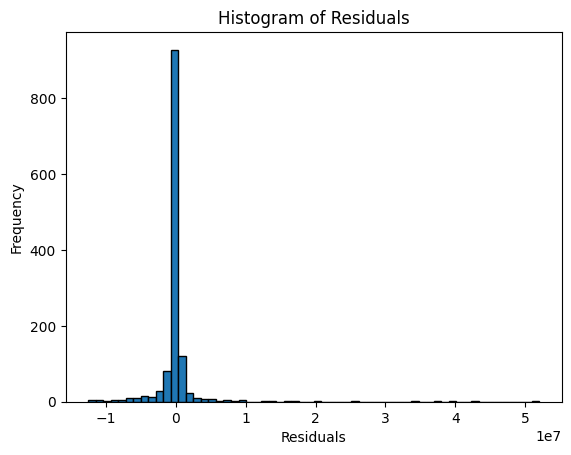

Average of Residuals: 77196.00250578257
Average of Absolute Residuals: 1105387.3180416345


In [19]:
import matplotlib.pyplot as plt


# Plot histogram of residuals
plt.hist(residuals, bins=60, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')

# Now we will try using less variables

In [20]:
x = df_work.drop(columns = ['price', 'latitude', 'longitude'])
y = df_work['price']
x.head()

,beds,bath,propertysqft,zip_code,type_co-op for sale,type_condo for sale,type_contingent,type_house for sale,type_multi-family home for sale,type_pending,type_townhouse for sale
0,6,6.0,6569.000000,10013,0,1,0,0,0,0,0
1,5,6.0,7488.000000,10007,0,1,0,0,0,0,0
2,1,1.0,2184.207862,11105,1,0,0,0,0,0,0
3,1,1.0,2184.207862,11105,1,0,0,0,0,0,0
4,1,1.0,2184.207862,11105,1,0,0,0,0,0,0


In [21]:
y.head()

0    50000000
1    40000000
2      169000
3      199000
4      225000
Name: price, dtype: int64

In [22]:
# lets split data between test & train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

## Now we will scale the data

In [23]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_train_scaled

array([[0.18181818, 0.0625    , 0.02047996, ..., 0.        , 0.        ,
        0.        ],
       [0.63636364, 0.125     , 0.06705197, ..., 1.        , 0.        ,
        0.        ],
       [0.09090909, 0.0625    , 0.01997738, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.45454545, 0.07418315, 0.08585668, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.03125   , 0.04058734, ..., 0.        , 0.        ,
        0.        ],
       [0.18181818, 0.0625    , 0.03176697, ..., 0.        , 0.        ,
        0.        ]])

In [24]:
x_test_scaled = scaler.fit_transform(X_test)
x_test_scaled

array([[0.27272727, 0.23529412, 0.0436882 , ..., 0.        , 0.        ,
        0.        ],
       [0.09090909, 0.11764706, 0.00974937, ..., 0.        , 0.        ,
        0.        ],
       [0.27272727, 0.11764706, 0.01483866, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.27272727, 0.35294118, 0.02888339, ..., 0.        , 0.        ,
        0.        ],
       [0.09090909, 0.11764706, 0.02888339, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05882353, 0.00600904, ..., 0.        , 0.        ,
        0.        ]])

#Try k-nearest neighbor regression with k=5

knn_scale_5 = KNeighborsRegressor(n_neighbors = 5)
knn_scale_5.fit(x_train_scaled, y_train)

#make prediction based on knn_scale_5 model
y_test_scaled_pred = knn_scale_5.predict(x_test_scaled)
y_train_scaled_pred = knn_scale_5.predict(x_train_scaled)

#mean squared error finding
mse_test = mean_squared_error(y_test_scaled_pred, y_test)
print('scaled test data mse: ', mse_test)

mse_train = mean_squared_error(y_train_scaled_pred, y_train)
print('scaled Train data mse: ', mse_train)

In [25]:
# Best parameter (k)

lowest_mse_test_k = -1
lowest_mse_train_k = -1
lowest_mse_diff_k = -1
lowest_mse_test = lowest_mse_train = lowest_mse_diff = 999999999999999


for i in range(1, 10):
    
    knn_scale_best = KNeighborsRegressor(n_neighbors = i)
    knn_scale_best.fit(x_train_scaled, y_train)

    y_test_scaled_pred_best = knn_scale_best.predict(x_test_scaled)
    y_train_scaled_pred_best = knn_scale_best.predict(x_train_scaled)
    
    print('test result for k = ', i)
    mse_test_best = mean_squared_error(y_test_scaled_pred_best, y_test)
    print('scaled test data mse: ', mse_test_best)

    mse_train_best = mean_squared_error(y_train_scaled_pred_best, y_train)
    print('scaled Train data mse: ', mse_train_best)
    print('\n\n')
    
    if(mse_test_best < lowest_mse_test ):
        lowest_mse_test= mse_test_best
        lowest_mse_test_k = i
        
    if(mse_train_best < lowest_mse_train):
        lowest_mse_train= mse_train_best
        lowest_mse_train_k = i
        
    if((mse_test_best - mse_train_best) < lowest_mse_diff) :
        lowest_mse_diff_k = i
        
        
print('lowest_mse_test is found from k value = ', lowest_mse_test_k)
print('lowest_mse_train is found from k value = ', lowest_mse_train_k)
print('lowest_mse_diff is found from k value = ', lowest_mse_diff_k)

test result for k =  1
scaled test data mse:  18779493562096.723
scaled Train data mse:  313471101858.68054



test result for k =  2
scaled test data mse:  12072852195795.396
scaled Train data mse:  3452483691213.3784



test result for k =  3
scaled test data mse:  10475406586846.473
scaled Train data mse:  4684934066303.948



test result for k =  4
scaled test data mse:  12128987614599.371
scaled Train data mse:  5578742244138.851



test result for k =  5
scaled test data mse:  10660539821663.887
scaled Train data mse:  6173296793258.426



test result for k =  6
scaled test data mse:  9969909539103.62
scaled Train data mse:  6895649882141.585



test result for k =  7
scaled test data mse:  9282478614761.785
scaled Train data mse:  7159751566703.663



test result for k =  8
scaled test data mse:  8770684342605.869
scaled Train data mse:  7422160990195.563



test result for k =  9
scaled test data mse:  8610470123628.413
scaled Train data mse:  7672299159250.124



lowest_mse_te

In [26]:
# Try k-nearest neighbor regression with k= 8 

knn_scale_best_few = KNeighborsRegressor(n_neighbors = 8)
knn_scale_best_few.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=8)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# make prediction based on knn_scale_5 model
# y_test_scaled_pred = knn_scale_9.predict(x_test_scaled)
# y_train_scaled_pred = knn_scale_5.predict(x_train_scaled)

# Make predictions on the test set
predictions = knn_scale_best_few.predict(x_test_scaled)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

median_price = y_test.median()
print(f'Median House Price: {median_price}')

if rmse < median_price:
    print("RMSE is less than Median House Price")
else:
    print("RMSE is greater than or equal to Median House Price")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_true=y_test, y_pred=predictions)
print("R-squared Score: %f" % r2)

Mean Squared Error: 8770684342605.869
Root Mean Squared Error: 2961534.1197774285
Median House Price: 848000.0
RMSE is greater than or equal to Median House Price
Mean Absolute Error: 1156658.3340400925
R-squared Score: 0.395049


In [28]:

from sklearn.inspection import permutation_importance

    
# Compute permutation importances
result = permutation_importance(knn_scale_best_few, x_test_scaled, y_test, n_repeats=10, random_state=42)

# Get feature importances
feature_importance = result.importances_mean

# Sort feature importances
sorted_idx = np.argsort(feature_importance)[::-1]

# Print feature importances
for idx in sorted_idx:
    print(f"Feature index: {idx}, Importance: {feature_importance[idx]}")

Feature index: 0, Importance: 0.8440791168401844
Feature index: 3, Importance: 0.322995867254304
Feature index: 4, Importance: 0.11508400546050827
Feature index: 1, Importance: 0.09822221622857648
Feature index: 5, Importance: 0.0830233995670159
Feature index: 2, Importance: 0.05861215349419853
Feature index: 10, Importance: 0.05467947118450676
Feature index: 8, Importance: 0.017947327174114326
Feature index: 9, Importance: 0.0026720040085710605
Feature index: 7, Importance: -0.0035339804475613577
Feature index: 6, Importance: -0.004274130446445423


In [29]:
# Assuming x_train_scaled is your original feature matrix
feature_names = x.columns

# Print feature importances with feature names
for idx in sorted_idx:
    print(f"Feature: {feature_names[idx]}, Importance                 : {feature_importance[idx]}")

Feature: beds, Importance                 : 0.8440791168401844
Feature: zip_code, Importance                 : 0.322995867254304
Feature: type_co-op for sale, Importance                 : 0.11508400546050827
Feature: bath, Importance                 : 0.09822221622857648
Feature: type_condo for sale, Importance                 : 0.0830233995670159
Feature: propertysqft, Importance                 : 0.05861215349419853
Feature: type_townhouse for sale, Importance                 : 0.05467947118450676
Feature: type_multi-family home for sale, Importance                 : 0.017947327174114326
Feature: type_pending, Importance                 : 0.0026720040085710605
Feature: type_house for sale, Importance                 : -0.0035339804475613577
Feature: type_contingent, Importance                 : -0.004274130446445423


# Risiduals

In [30]:
# Calculate residuals
residuals = y_test - predictions

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

df_residuals.head(50)

,Actual,Predicted,Residuals
3885,1139000,1.247225e+06,-1.082248e+05
3593,320000,4.329875e+05,-1.129875e+05
2320,625000,2.774625e+06,-2.149625e+06
998,340000,4.131250e+05,-7.312500e+04
1189,349500,2.868609e+05,6.263912e+04
2150,725000,2.262125e+06,-1.537125e+06
2038,1649000,2.856125e+06,-1.207125e+06
2867,599000,8.735000e+05,-2.745000e+05
3394,289000,3.114999e+05,-2.249988e+04
1370,625000,4.847360e+05,1.402640e+05


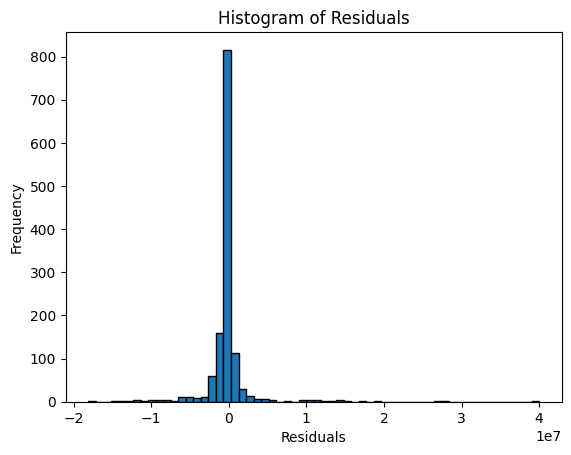

Average of Residuals: -260410.9732074017
Average of Absolute Residuals: 1156658.3340400925


In [31]:
import matplotlib.pyplot as plt


# Plot histogram of residuals
plt.hist(residuals, bins=60, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')